In [1]:
import numpy as np

In [2]:
n_0 = 1000
n_1 = 100
p = 0.8
z = np.random.normal(0,1,n_0)
s = np.random.choice([-1,1], p=[1-p,p],size=n_1)

In [3]:
def loss(arg, l_w, l_m, k, t, n):
    w,b = arg
    phi = np.tanh(b + k*t*w*s[:,None] + w*z[None,:])
    phi2 = phi**2
    phi_p = 1-phi2
    phi_pp = -2*phi*phi_p
    phi_s = phi * s[:,None]
    phi_p_s = phi_p * s[:,None]
    phi_pp_s = phi_pp * s[:,None]
    denom = (l_m + n * phi2.mean())**2
    num = n**2 * phi_s.mean()**2 + n*phi.mean()**2
    eq2 = -n*(denom * (phi_pp.mean() * phi.mean() + n * phi_pp_s.mean() * phi_s.mean())-num*((phi_p**2).mean()+(phi*phi_pp).mean()))
    res1 = w*(l_w*denom**2 + eq2) - n*k*t *(denom*(phi_p_s.mean()*phi.mean() + n * phi_p.mean()*phi_s.mean())-num*(phi_s*phi_p).mean())
    res2 = denom*(phi_p.mean()*phi.mean() + n * phi_p_s.mean() * phi_s.mean())-num * (phi*phi_p).mean()
    # return res1**2 + res2**2
    return np.abs(res1) + np.abs(res2)

In [4]:
from scipy.optimize import minimize

In [5]:
res = {}
for t in np.linspace(0,1,20):
    res[t] = minimize(loss,[1,1],args=(0.1,0.1,2,t, n_1), tol=1e-4).x

In [6]:
import pandas as pd

<Axes: >

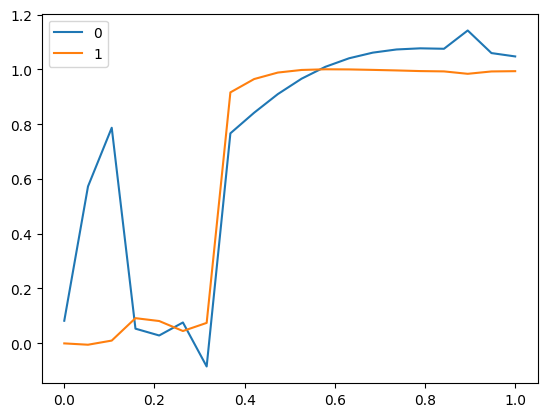

In [7]:
pd.DataFrame(res).T.plot()

Epoch 0, Loss: -306.4399108886719


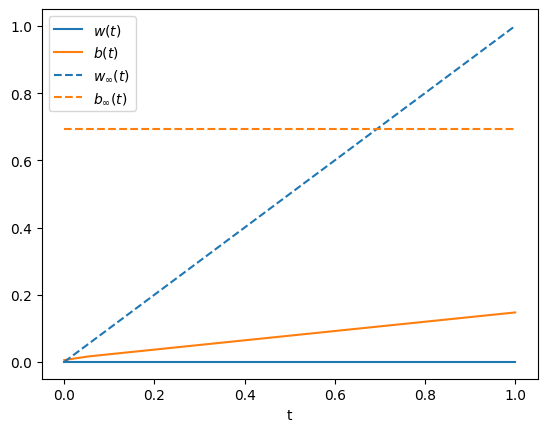

Epoch 100, Loss: -484.8655090332031
Epoch 200, Loss: -480.5484313964844
Epoch 300, Loss: -490.3070983886719
Epoch 400, Loss: -476.9535217285156
Epoch 500, Loss: -488.177978515625
Epoch 600, Loss: -484.7290344238281
Epoch 700, Loss: -490.80621337890625
Epoch 800, Loss: -476.4429931640625
Epoch 900, Loss: -481.8332824707031
Epoch 1000, Loss: -488.7413024902344
Epoch 1100, Loss: -487.9765930175781
Epoch 1200, Loss: -482.53436279296875
Epoch 1300, Loss: -484.8132019042969
Epoch 1400, Loss: -479.4973449707031
Epoch 1500, Loss: -479.6279602050781
Epoch 1600, Loss: -481.23162841796875
Epoch 1700, Loss: -481.9494934082031
Epoch 1800, Loss: -478.57647705078125
Epoch 1900, Loss: -496.7596435546875
Epoch 2000, Loss: -485.6190185546875
Epoch 2100, Loss: -487.3975830078125
Epoch 2200, Loss: -479.7431640625
Epoch 2300, Loss: -463.101318359375
Epoch 2400, Loss: -466.580322265625
Epoch 2500, Loss: -480.7109680175781
Epoch 2600, Loss: -480.3694152832031
Epoch 2700, Loss: -488.64862060546875
Epoch 2800,

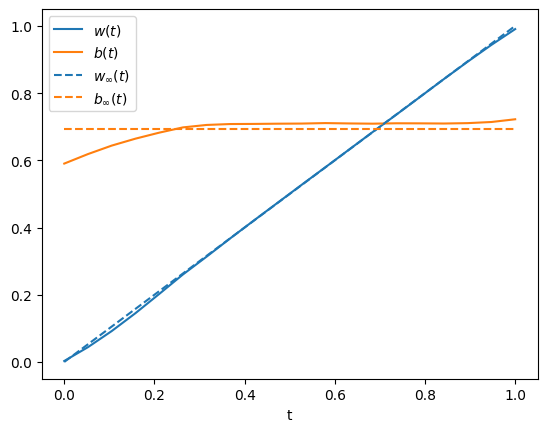

Epoch 5100, Loss: -486.0962829589844
Epoch 5200, Loss: -475.765380859375
Epoch 5300, Loss: -472.5843811035156
Epoch 5400, Loss: -494.9303894042969
Epoch 5500, Loss: -481.5107727050781
Epoch 5600, Loss: -483.6477355957031
Epoch 5700, Loss: -479.9334411621094
Epoch 5800, Loss: -478.386962890625
Epoch 5900, Loss: -477.7254333496094
Epoch 6000, Loss: -481.73687744140625
Epoch 6100, Loss: -491.4350280761719
Epoch 6200, Loss: -488.2057800292969
Epoch 6300, Loss: -482.4108581542969
Epoch 6400, Loss: -466.7516784667969
Epoch 6500, Loss: -488.9705810546875
Epoch 6600, Loss: -474.0599365234375
Epoch 6700, Loss: -474.287353515625
Epoch 6800, Loss: -478.8275451660156
Epoch 6900, Loss: -480.30291748046875
Epoch 7000, Loss: -481.76507568359375
Epoch 7100, Loss: -469.15106201171875
Epoch 7200, Loss: -475.2706298828125
Epoch 7300, Loss: -479.4291076660156
Epoch 7400, Loss: -493.4164733886719
Epoch 7500, Loss: -486.9990234375
Epoch 7600, Loss: -493.2727355957031
Epoch 7700, Loss: -479.6634826660156
Epo

In [26]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        # self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 2)  # Output for w and b
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # Xavier Initialization for the weights
                nn.init.xavier_normal_(m.weight)
                # Zero initialization for the biases
                nn.init.zeros_(m.bias)

    def forward(self, t):
        t = torch.relu(self.fc1(t))
        # t = torch.relu(self.fc2(t))
        t = torch.relu(self.fc3(t))
        out = torch.relu(self.fc4(t))
        return out

# def mean(x):
#     return x.mean(axis=[2,3])
def mean(x):
    return x.mean(axis=[3])@pi_s

# def loss_fn(w_b, L_w, L_m, k, t, n, s, z):
#     w, b = w_b[:, 0], w_b[:, 1]
#     phi = torch.tanh(b[:,None,None,None] + k * t[:,:,None,None] * w[:,None,None,None] * s[None,None,:,None] + w[:,None,None,None] * z[None,None,:,:])
#     phi2 = phi**2
#     phi_p = 1-phi2
#     phi_pp = -2*phi*phi_p
#     phi_s = phi * s[None,None,:,None]
#     phi_p_s = phi_p * s[None,None,:,None]
#     phi_pp_s = phi_pp * s[None,None,:,None]
#     denom = (L_m + n * mean(phi2))**2
#     num = n**2 * mean(phi_s)**2 + n*mean(phi)**2
#     eq2 = -n*(denom * (mean(phi_pp) * mean(phi) + n * mean(phi_pp_s) * mean(phi_s))-num*(mean(phi_p**2)+mean(phi*phi_pp)))
#     res1 = w*(L_w*denom**2 + eq2) - n*k*t *(denom*(mean(phi_p_s)*mean(phi) + n * mean(phi_p)*mean(phi_s))-num*mean(phi_s*phi_p))
#     res2 = denom*(mean(phi_p)*mean(phi) + n * mean(phi_p_s) * mean(phi_s))-num * mean(phi*phi_p)
#     return (res1**2 + res2**2).sum()

def loss_fn(w_b, L_w, L_m, k, t, n, s, z):
    w, b = w_b[:, 0], w_b[:, 1]
    phi = torch.tanh(b[:,None,None,None] + k * t[:,:,None,None] * w[:,None,None,None] * s[None,None,:,None] + w[:,None,None,None] * z[None,None,:,:])
    phi2 = phi**2
    phi_p = 1-phi2
    phi_s = phi * s[None,None,:,None]
    res = -((n* mean(phi_s))**2 + n * mean(phi)**2)/(L_m + n * mean(phi2)) + L_w * w**2
    # res = - mean(phi_s)**2/ mean(phi2)
    return res.mean()

# Hyperparameters
n_0 = 1000
p = 0.8
L_w = 1e-1
L_m = 1e-1
k = 1
n_1 = 2
n = 1000
s = torch.tensor([1.,-1.])
pi_s = torch.tensor([p,1-p])

# Convert to PyTorch tensors
# s = torch.tensor(s, dtype=torch.float32)

# Training setup
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, amsgrad=True)
epochs = 10000
t_values = torch.linspace(0, 1, steps=20).reshape(-1, 1)  # Time input

def model_n_inf(t):
    res = np.zeros((len(t),2))
    res[:,0] = k * t
    res[:,1] = np.arctanh(2*p-1)
    return res

def make_plot():
    # Extract predictions for w and b
    w_b_pred = model(t_values).detach().numpy()

    # Plot the results
    fig, ax = plt.subplots()
    df = pd.DataFrame(w_b_pred, columns=[r"$w(t)$", r"$b(t)$"])
    df["t"] = t_values.detach().numpy()
    df.plot(ax=ax, x="t")

    w_b_n_inf = model_n_inf(t_values.squeeze())
    df = pd.DataFrame(w_b_n_inf, columns=[r"$w_\infty(t)$", r"$b_\infty(t)$"])
    df["t"] = t_values.detach().numpy()
    df.plot(ax=ax, x="t", ls="--", color=["C0","C1"])
    plt.show()

# Training loop
for epoch in range(epochs):
    optimizer.zero_grad()
    w_b = model(t_values)  # Predict w(t) and b(t)

    z = np.random.normal(0, 1, (n_1, n_0))
    z = torch.tensor(z, dtype=torch.float32)

    loss = loss_fn(w_b, L_w=L_w, L_m=L_m, k=k, t=t_values, n=n, s=s, z=z)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

    if epoch % 5000 == 0:
        make_plot()

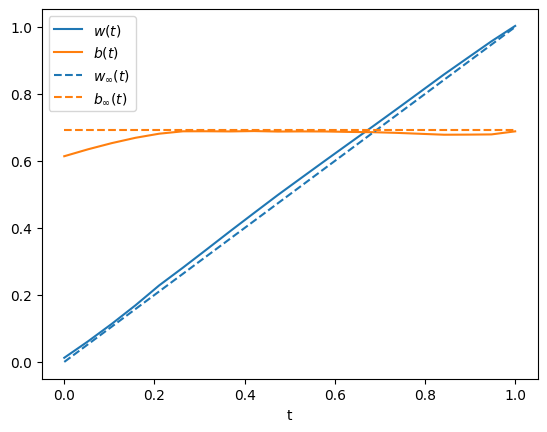

In [29]:
make_plot()

In [28]:
w_b_n_inf = torch.tensor(model_n_inf(t_values.squeeze()), dtype=torch.float32)
loss_fn(w_b_n_inf, L_w=L_w, L_m=L_m, k=k, t=t_values, n=n_1, s=s, z=z)

tensor(-1.5567)